In [1]:
import geopandas
import fiona
import numpy as np
%matplotlib inline

In [32]:
df = geopandas.read_file('polling_divisions_boundaries_2015_en.gdb')

In [33]:
data = df.query('fed_num == 59017')

In [34]:
data.crs

{'init': 'epsg:3978'}

In [35]:
data.head()

Shape_Length    Shape_Area      pd_id  pd_num pd_nbr_sfx pd_type_code  \
8263   5242.080362  4.064181e+05  1108059.0      70          0            N   
8264   5134.461977  9.562006e+05  1108060.0      71          0            N   
8281  10674.369526  2.670721e+06  1107993.0      10          0            N   
8282  14722.465655  7.954441e+06  1108098.0     118          0            N   
8291  18404.703847  1.784376e+07  1108094.0     121          0            N   

     pd_type adv_poll          ad_updt_dte  fed_num  ed_id  \
8263  Normal      606  2014-01-03T08:41:36    59017   1690   
8264  Normal      609  2013-12-19T09:50:32    59017   1690   
8281  Normal      600  2013-12-19T08:52:51    59017   1690   
8282  Normal      612  2013-12-19T09:58:56    59017   1690   
8291  Normal      612  2013-12-19T09:58:56    59017   1690   

               a_updt_dte           g_updt_dte emrp_name   poll_name  \
8263  2014-07-23T14:14:55  2013-10-04T08:30:10        70     Mission   
8264  2014-07-23T14:14:55  2013-10-04T08:30:10        71     Mission   
8281  2014-07-23T14:14:55  2013-12-30T15:15:52        10    Lillooet   
8282  2014-07-23T14:14:55  2013-10-04T08:30:10       118  Abbotsford   
8291  2014-07-23T14:14:55  2013-10-04T08:30:10       121  Abbotsford   

     pn_updt_dte urban_rural_ind  \
8263        None               U   
8264        None               U   
8281        None               U   
8282        None               U   
8291        None               U   

                                               geometry  
8263  (POLYGON ((-1933606.697509766 438268.312927246...  
8264  (POLYGON ((-1933584.311584473 437008.243713378...  
8281  (POLYGON ((-1836539.72442627 580535.8283081055...  
8282  (POLYGON ((-1934443.875976562 430181.585083007...  
8291  (POLYGON ((-1930485.988098145 431041.294494628...

In [36]:
data = data.to_crs(epsg = 4326)

In [8]:
data.shape

(158, 18)

In [9]:
import pandas as pd

In [10]:
results = pd.read_csv('pollbypoll_bureauparbureau59017.csv')

In [12]:
results.drop(columns=['Electoral District Number', 'Electoral District Name'], inplace=True)

In [13]:
results.rename(columns={'Dennis Adamson': 'NDP',
                      'Arthur Alexander Green': 'Green',
                      'Wyatt Scott': 'Independent',
                      'Jati Sidhu': 'Liberal',
                      'Brad Vis': 'Conservative',
                      'Elaine Wismer': 'Marxist-Leninist'
                     }, inplace=True)

In [14]:
results['Polling Station Name'].unique()

array(['Gold Bridge', 'Shalalth', 'Lillooet', 'Fountain Valley',
       'Cache Creek', 'Walhachin', 'Ashcroft', 'Spences Bridge', 'Lytton',
       'North Bend', 'Boston Bar', 'Pemberton', 'Chehalis 5', 'Dewdney',
       'Mission', 'Abbotsford', 'Deroche', 'Lake Errock', 'Nicomen',
       'Harrison Mills', 'Agassiz', 'Harrison Hot Springs',
       'Seabird Island ', 'Fraser Valley H ',
       'Mobile poll/Bureau itinérant', 'Squamish-Lillooet',
       'Fraser Valley', 'Group 1/Groupe 1', 'Group 2/Groupe 2'],
      dtype=object)

In [37]:
results.head()

Polling Station Number  NDP  Green  Independent  Liberal  Conservative  \
0                     1.0   33     12            0       28            30   
1                     3.0   86     10            2       30            43   
2                     4.0   84      4            0       11             8   
3                     5.0   77     14            8       55            57   
4                     6.0   67     17            1       49            69   

   Marxist-Leninist  Rejected Ballots  Total Votes  Electors  
0                 0                 0          103     157.0  
1                 0                 1          172     348.0  
2                 0                 0          107     149.0  
3                 1                 0          212     276.0  
4                 0                 0          203     391.0

In [17]:
results.dropna(inplace=True)
# mission_results['Polling Station Number']

In [18]:
results = results.groupby('Polling Station Number').agg(np.sum)

In [38]:
results['winner'] = results[['NDP','Green','Independent','Liberal','Conservative']].idxmax(axis=1)

In [39]:
results.head()

Polling Station Number  NDP  Green  Independent  Liberal  Conservative  \
0                     1.0   33     12            0       28            30   
1                     3.0   86     10            2       30            43   
2                     4.0   84      4            0       11             8   
3                     5.0   77     14            8       55            57   
4                     6.0   67     17            1       49            69   

   Marxist-Leninist  Rejected Ballots  Total Votes  Electors        winner  
0                 0                 0          103     157.0           NDP  
1                 0                 1          172     348.0           NDP  
2                 0                 0          107     149.0           NDP  
3                 1                 0          212     276.0           NDP  
4                 0                 0          203     391.0  Conservative

In [19]:
results.reset_index(inplace=True)

In [40]:
data.head()

Shape_Length    Shape_Area      pd_id  pd_num pd_nbr_sfx pd_type_code  \
8263   5242.080362  4.064181e+05  1108059.0      70          0            N   
8264   5134.461977  9.562006e+05  1108060.0      71          0            N   
8281  10674.369526  2.670721e+06  1107993.0      10          0            N   
8282  14722.465655  7.954441e+06  1108098.0     118          0            N   
8291  18404.703847  1.784376e+07  1108094.0     121          0            N   

     pd_type adv_poll          ad_updt_dte  fed_num  ed_id  \
8263  Normal      606  2014-01-03T08:41:36    59017   1690   
8264  Normal      609  2013-12-19T09:50:32    59017   1690   
8281  Normal      600  2013-12-19T08:52:51    59017   1690   
8282  Normal      612  2013-12-19T09:58:56    59017   1690   
8291  Normal      612  2013-12-19T09:58:56    59017   1690   

               a_updt_dte           g_updt_dte emrp_name   poll_name  \
8263  2014-07-23T14:14:55  2013-10-04T08:30:10        70     Mission   
8264  2014-07-23T14:14:55  2013-10-04T08:30:10        71     Mission   
8281  2014-07-23T14:14:55  2013-12-30T15:15:52        10    Lillooet   
8282  2014-07-23T14:14:55  2013-10-04T08:30:10       118  Abbotsford   
8291  2014-07-23T14:14:55  2013-10-04T08:30:10       121  Abbotsford   

     pn_updt_dte urban_rural_ind  \
8263        None               U   
8264        None               U   
8281        None               U   
8282        None               U   
8291        None               U   

                                               geometry  
8263  (POLYGON ((-122.351925419026 49.1438750954418,...  
8264  (POLYGON ((-122.3444443280899 49.1336544988501...  
8281  (POLYGON ((-121.9402654359073 50.6746748115543...  
8282  (POLYGON ((-122.3161880007245 49.0746065446828...  
8291  (POLYGON ((-122.2717993435738 49.0964504547601...

In [158]:
lib_json = mission_results.loc[:,['Polling Station Number','Liberal']].set_index('Polling Station Number').to_dict()['Liberal']
ndp_json = mission_results.loc[:,['Polling Station Number','NDP']].set_index('Polling Station Number').to_dict()['NDP']

In [20]:
results.shape

(153, 10)

In [21]:
data.shape

(158, 18)

In [41]:
data = pd.merge(data, results,left_on='pd_num',right_on='Polling Station Number', how='inner')

In [23]:
data = data.query('pd_num < 400')

In [24]:
data.shape

(150, 28)

In [42]:
data.head()

Shape_Length    Shape_Area      pd_id  pd_num pd_nbr_sfx pd_type_code  \
0   5242.080362  4.064181e+05  1108059.0      70          0            N   
1   5134.461977  9.562006e+05  1108060.0      71          0            N   
2  10674.369526  2.670721e+06  1107993.0      10          0            N   
3  14722.465655  7.954441e+06  1108098.0     118          0            N   
4  18404.703847  1.784376e+07  1108094.0     121          0            N   

  pd_type adv_poll          ad_updt_dte  fed_num  ...  NDP Green Independent  \
0  Normal      606  2014-01-03T08:41:36    59017  ...   55    18           6   
1  Normal      609  2013-12-19T09:50:32    59017  ...   72    14           8   
2  Normal      600  2013-12-19T08:52:51    59017  ...   66     9           4   
3  Normal      612  2013-12-19T09:58:56    59017  ...   18     5           4   
4  Normal      612  2013-12-19T09:58:56    59017  ...   26    20           5   

  Liberal Conservative Marxist-Leninist Rejected Ballots Total Votes  \
0      79           51                0                1         210   
1     119           67                0                0         280   
2      55           53                0                0         187   
3      87          142                0                1         257   
4      92          213                0                3         359   

   Electors        winner  
0     417.0       Liberal  
1     470.0       Liberal  
2     702.0           NDP  
3     454.0  Conservative  
4     575.0  Conservative  

[5 rows x 29 columns]

In [70]:
len(data['pd_num'].unique())

153

In [43]:
data.to_file("full_data.geojson", driver='GeoJSON')

In [26]:
from ipyleaflet import Map, Marker, GeoJSON, LayersControl, basemaps, Choropleth, FullScreenControl
import json

In [30]:
data

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'Shape_Length': 5242.080362305301,
    'Shape_Area': 406418.10874701664,
    'pd_id': 1108059.0,
    'pd_num': 70,
    'pd_nbr_sfx': '0',
    'pd_type_code': 'N',
    'pd_type': 'Normal',
    'adv_poll': '606',
    'ad_updt_dte': '2014-01-03T08:41:36',
    'fed_num': 59017,
    'ed_id': 1690,
    'a_updt_dte': '2014-07-23T14:14:55',
    'g_updt_dte': '2013-10-04T08:30:10',
    'emrp_name': '70',
    'poll_name': 'Mission',
    'pn_updt_dte': None,
    'urban_rural_ind': 'U',
    'Polling Station Number': 70.0,
    'NDP': 55,
    'Green': 18,
    'Independent': 6,
    'Liberal': 79,
    'Conservative': 51,
    'Marxist-Leninist': 0,
    'Rejected Ballots': 1,
    'Total Votes': 210,
    'Electors': 417.0},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-122.35192541902599, 49.1438750954418],
       [-122.35

In [27]:
with open("full_data.geojson", 'r') as f:
    data = json.load(f)

In [29]:
for feature in data['features']:
    feature['id'] = feature['properties']['pd_num']

In [90]:
geo_data = GeoData(geo_dataframe = mission,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':1, 'weight':1, 'dashArray':'2', 'fillOpacity':0.5},
                   name = 'Countries')
# layer = Choropleth(
#     geo_data=data,
#     choro_data=lib_json,
#     colormap=linear.OrRd_09,
#     style={'fillOpacity':0.5}
# )
m = Map(center=(49.145, -122.317632), zoom=14)
geo_json = GeoJSON(data=data, style = {'color': 'green'})
m.layout.height = '600px'
m.add_layer(geo_json)
m.add_control(LayersControl())
m.add_control(FullScreenControl())
display(m)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [44]:
geo_data = GeoData(geo_dataframe = mission, style={'fillColor':'#3366cc' ,'opacity':0.9}, name= 'EDA')

In [115]:
import pandas 
from pyproj import Proj, transform
from shapely.geometry import Point

In [117]:
inProj = Proj({'init': 'epsg:3978'})
outProj = Proj({'init': 'epsg:3857'})

In [57]:
from branca.colormap import linear, ColorMap

In [96]:
linear.YlOrBr_09

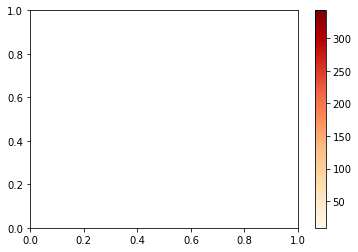

In [137]:
m = cm.ScalarMappable(cmap=cm.OrRd)
m.set_array(list(lib_json.values()))
plt.colorbar(m)